In [17]:
#1 Gradient descent on 1D function

import sympy as sym
import random

# Feature x
x = sym.Symbol('x')

# Objective function f(x)
f = x**2+(3*x)+2

# Gradients wrt x
grad_f = sym.diff(f, x)
learn_rate = 0.45

# Initialize the values of x randomly
x_val = float(random.randrange(1, 500))/100

# Values of gradients at initial value of x
grad_f_val = grad_f.subs(x,x_val)


# Apply gradient descent technique and update the value of x till convergence
count = 0
while grad_f_val != 0.00:
    x_val = x_val - (learn_rate)*grad_f_val
    grad_f_val = grad_f.subs(x,x_val)
    grad_f_val = round(grad_f_val,2)
    count += 1
    if count>=100:
        break

# Minimizer x
x_val = round(x_val,2)

# Minimum value of objective function calculated using minimizer
min1 = round(f.subs(x,x_val),2)
print('Using gradient descent, the minima of the function f(x)=',f,'occurs at x=',x_val,'and the corresponding minimum value of f(x) is',min1)



Using gradient descent, the minima of the function f(x)= x**2 + 3*x + 2 occurs at x= -1.50 and the corresponding minimum value of f(x) is -0.25


In [18]:
#2 Gradient descent on 2D function

import sympy as sym
import random

# Feature x1 and x2
x1,x2 = sym.symbols('x1 x2')

# Objective function f(x1,x2)
f = x1**2 + x2**2

# Gradients wrt x1 and x2
grad_f1 = sym.diff(f,x1)
grad_f2 = sym.diff(f,x2)
learn_rate = 0.8

# Initialize the values of x1 and x2 randomly
x1_val = float(random.randrange(1, 500))/100
x2_val = float(random.randrange(1, 500))/100

# Values of gradients at initial values of x1 and x2
grad_f1_val = grad_f1.subs(x1,x1_val).subs(x2,x2_val)
grad_f2_val = grad_f2.subs(x1,x1_val).subs(x2,x2_val)



# Apply gradient descent technique and update the value of x1 and x2 till convergence
count = 0
while not (grad_f1_val == 0.00 and grad_f2_val == 0.00):
    x1_val = x1_val - (learn_rate)*grad_f1_val
    x2_val = x2_val - (learn_rate)*grad_f2_val
    grad_f1_val = grad_f1.subs(x1,x1_val).subs(x2,x2_val)
    grad_f2_val = grad_f2.subs(x1,x1_val).subs(x2,x2_val)
    grad_f1_val = round(grad_f1_val,2)
    grad_f2_val = round(grad_f2_val,2)
    count += 1
    if count>=100:
        break


# Minimizer x1,x2
x1_val = round(x1_val,2)
x2_val = round(x2_val,2)

# Minimum value of objective function calculated using minimizer
min1 = round(f.subs(x1,x1_val).subs(x2,x2_val),2)
print('Using gradient descent, the minima of the function f(x1,x2)=',f,'occurs at x1=',x1_val,',x2=',x2_val,'and the corresponding minimum value is',min1)




Using gradient descent, the minima of the function f(x1,x2)= x1**2 + x2**2 occurs at x1= 0.0 ,x2= 0.0 and the corresponding minimum value is 0


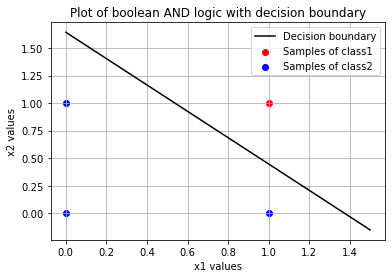

In [19]:
#3 Perceptron for AND logic


import random
import numpy as np
import matplotlib.pyplot as plt


# Threshold and sigmoid function definitions
def threshold(value):
    if value>0.0:
        return 1
    else:
        return 0

def sigmoid(value):
    temp = 1/(1+np.exp(-value))
    if temp>0.5:
        return 1
    else:
        return 0


# Augmented form of Input data points
x0 = np.array([1,1,1,1])
x1 = np.array([0,0,1,1])
x2 = np.array([0,1,0,1])

# Matrix corresponding to input feature vectors
X = np.array([x0,x1,x2])

# Matrices to store class1 and class2 feature vectors
C1 = np.zeros((2,1),dtype=int)
C2 = np.zeros((2,1),dtype=int)

# Size of training data samples
n = X.shape[1]

# Actual and predicted outputs
y_act = np.array([0,0,0,1])
y_pred = np.zeros(4,dtype=int)

# Learning rate
learn_rate = 0.7

# Weight vector augmented with bias
w = np.empty(3)
for i in range(3):
    w[i] = round(float(random.randrange(1,500))/100,2)
    

# No. of iterations
count = 0
j = 0
# Calculating predicted value of y at each data sample
while not np.all((y_act-y_pred==0)) and count<=100:
    x = X[:,j].reshape(3)
    y_pred[j] = sigmoid(np.dot(w,x))
    # Go to next sample if predicted and actual outputs are same for an input sample
    if y_act[j] == y_pred[j]:
        j+=1
    # Update the weights and start calculating the predicted output values from 1st data sample
    else:
        for i in range(3):
            w[i] = w[i] + learn_rate*(y_act[j]-y_pred[j])*X[i][j]
            w[i] = round(w[i],2)
        j = 0
    count+=1


# Store the class1 and class2 data samples into separate matrices C1 & C2
for j in range(n):
    if y_pred[j] == 1:
        temp = X[1:3,j].reshape((2,1))
        C1 = np.append(C1,temp,axis=1)
    else:
        temp = X[1:3,j].reshape((2,1))
        C2 = np.append(C2,temp,axis=1)

      

# Calculate the line equation based on the weights and bias and plot the line for input feature vectors
a = np.linspace(0,1.5,10)
b = (-w[0]-(w[1]*a))/w[2] 
# str1 = 'Decision boundary' + str(w[0]) + '+' + str(w[1]) + '*x1+' + str(w[2]) + '*x2=0'     
fig = plt.figure()

# Scatter plot the class1 and class2 data samples in separate colours

plt.scatter(C1[0,1:],C1[1,1:],color='red',label='Samples of class1')
plt.scatter(C2[0,1:],C2[1,1:],color='blue',label='Samples of class2')
plt.plot(a,b,color='black',label='Decision boundary')
plt.legend()
plt.title('Plot of boolean AND logic with decision boundary')
plt.xlabel('x1 values')
plt.ylabel('x2 values')
plt.grid()







In [20]:
#4 Perceptron for XOR logic

print('Since the sample points of XOR are not linearly separable, single layer perceptron cant be used to classify the XOR data points')


Since the sample points of XOR are not linearly separable, single layer perceptron cant be used to classify the XOR data point
